# Exploring Relationships 

# Step 1 - Import Visualization Libraries & Data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Ensure charts are displayed in notebook
%matplotlib inline

In [4]:
#folder shortcut
path = r'C:\Users\Admin\Documents\CF Tasks\Python Advanced Analytics'

In [5]:
# Import data
df_listings = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_citi_61.csv'))

In [6]:
# Check head
df_listings.head()

Unnamed: 0 trip_id weekday  start_hour  start_station_id  \
0           0  LnQzQk     Mon          18               523   
1           1  IL9boN     Thu          18               257   
2           2  46clGB     Wed          19               479   
3           3  v7vdFt     Sat          11               527   
4           5  HbKJBz     Fri          22               293   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4    Lafayette St & E 8 St               40.730287               -73.990765   

   end_station_id     end_station_name  end_station_latitude  \
0             334      W 20 St & 7 Ave             40.742388   
1             236  St Marks Pl & 2 Ave             40.728419   
2             513     W 56 St & 10 Ave             40.768254   
3             441      E 52 St & 2 Ave             40.756014   
4             432    E 7 St & Avenue A             40.726218   

   end_station_longitude  trip_duration  subscriber  birth_year  gender  \
0             -73.997262            993  Subscriber      1968.0       2   
1             -73.987140            581  Subscriber      1983.0       1   
2             -73.988639            361  Subscriber      1989.0       1   
3             -73.967416            561  Subscriber      1988.0       2   
4             -73.983799            427  Subscriber      1986.0       2   

         start_of_ride          end_of_ride  
0  2013-09-09 18:18:55  2013-09-09 18:35:28  
1  2013-09-12 18:38:53  2013-09-12 18:48:34  
2  2013-09-18 19:44:04  2013-09-18 19:50:05  
3  2013-09-28 11:54:37  2013-09-28 12:03:58  
4  2013-09-27 22:01:01  2013-09-27 22:08:08

# Step 2: Pick Variables

In [7]:
# Create subset including: below variables
df_sub = df_listings[['start_station_id', 'end_station_id', 'trip_duration', 'start_station_latitude','start_station_longitude', 'birth_year','gender','end_station_latitude','end_station_longitude']]

In [8]:
df_sub

start_station_id  end_station_id  trip_duration  \
0                   523             334            993   
1                   257             236            581   
2                   479             513            361   
3                   527             441            561   
4                   293             432            427   
...                 ...             ...            ...   
42988               435             448            975   
42989               224             301           1541   
42990               261             151           1191   
42991               402             524           1050   
42992               515             488            370   

       start_station_latitude  start_station_longitude  birth_year  gender  \
0                   40.754666               -73.991382      1968.0       2   
1                   40.719392               -74.002472      1983.0       1   
2                   40.760193               -73.991255      1989.0       1   
3                   40.743156               -73.974347      1988.0       2   
4                   40.730287               -73.990765      1986.0       2   
...                       ...                      ...         ...     ...   
42988               40.741740               -73.994156      1973.0       1   
42989               40.711464               -74.005524      1975.0       1   
42990               40.694749               -73.983625      1970.0       2   
42991               40.740343               -73.989551      1961.0       2   
42992               40.760094               -73.994618      1980.0       2   

       end_station_latitude  end_station_longitude  
0                 40.742388             -73.997262  
1                 40.728419             -73.987140  
2                 40.768254             -73.988639  
3                 40.756014             -73.967416  
4                 40.726218             -73.983799  
...                     ...                    ...  
42988             40.756604             -73.997901  
42989             40.722174             -73.983688  
42990             40.721816             -73.997203  
42991             40.755273             -73.983169  
42992             40.756458             -73.993722  

[42993 rows x 9 columns]

In [9]:
df_sub.corr()

start_station_id  end_station_id  trip_duration  \
start_station_id                 1.000000        0.043066       0.046764   
end_station_id                   0.043066        1.000000       0.036858   
trip_duration                    0.046764        0.036858       1.000000   
start_station_latitude           0.106780        0.053565      -0.016408   
start_station_longitude          0.086098        0.022999       0.001572   
birth_year                      -0.004759       -0.004261      -0.046076   
gender                          -0.008594       -0.008187       0.102948   
end_station_latitude             0.057260        0.104482      -0.046746   
end_station_longitude            0.023396        0.090608      -0.000024   

                         start_station_latitude  start_station_longitude  \
start_station_id                       0.106780                 0.086098   
end_station_id                         0.053565                 0.022999   
trip_duration                         -0.016408                 0.001572   
start_station_latitude                 1.000000                 0.203817   
start_station_longitude                0.203817                 1.000000   
birth_year                            -0.046369                 0.028715   
gender                                -0.065446                -0.018369   
end_station_latitude                   0.579007                 0.082088   
end_station_longitude                  0.067596                 0.403150   

                         birth_year    gender  end_station_latitude  \
start_station_id          -0.004759 -0.008594              0.057260   
end_station_id            -0.004261 -0.008187              0.104482   
trip_duration             -0.046076  0.102948             -0.046746   
start_station_latitude    -0.046369 -0.065446              0.579007   
start_station_longitude    0.028715 -0.018369              0.082088   
birth_year                 1.000000  0.068891             -0.042970   
gender                     0.068891  1.000000             -0.062168   
end_station_latitude      -0.042970 -0.062168              1.000000   
end_station_longitude      0.039176 -0.023609              0.189827   

                         end_station_longitude  
start_station_id                      0.023396  
end_station_id                        0.090608  
trip_duration                        -0.000024  
start_station_latitude                0.067596  
start_station_longitude               0.403150  
birth_year                            0.039176  
gender                               -0.023609  
end_station_latitude                  0.189827  
end_station_longitude                 1.000000

# Step 3 - Create Correlation Matrix Heatmap

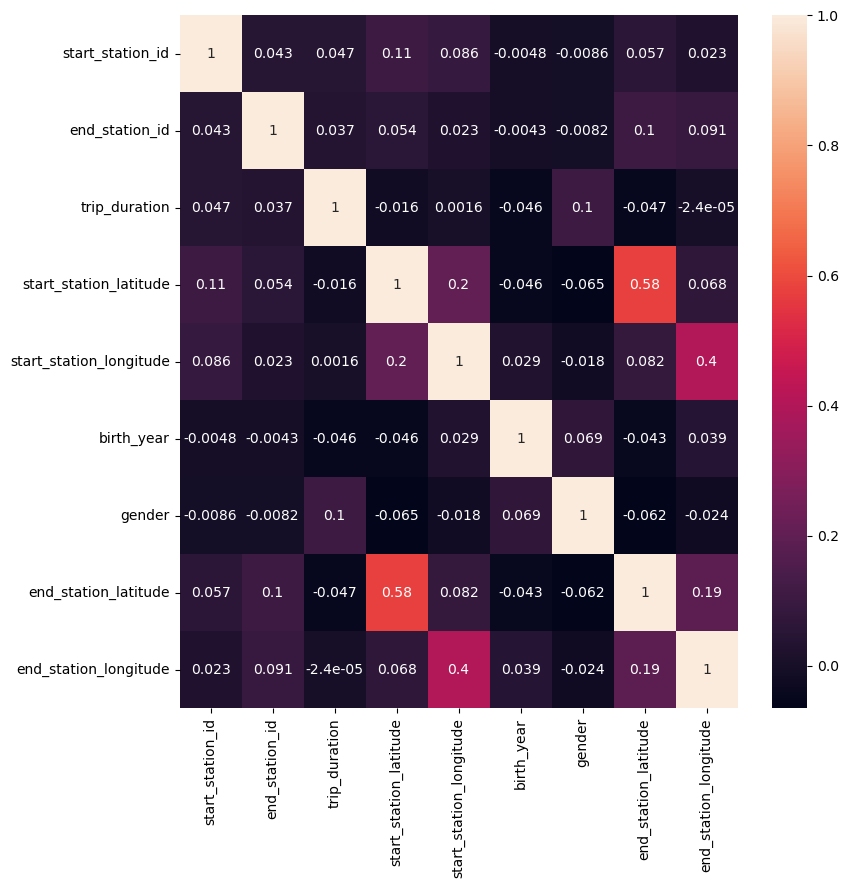

In [10]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_1 = sns.heatmap(df_sub.corr(), annot = True, ax = ax)

In [17]:
#Export viz
corr_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap.png'))

There are not any particularly strong correlations between these variables - the strongest is between the start_station_latitude and end_station_latitude.

# Step 4 Continued - Scatterplots

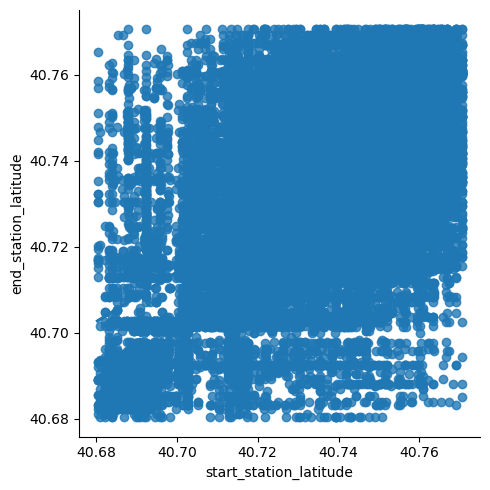

In [15]:
# Create scatterplot for the "start_station_latitude" and "end_station_latitude" columns 
sns.lmplot(x = 'start_station_latitude', y = 'end_station_latitude', data = df_sub)

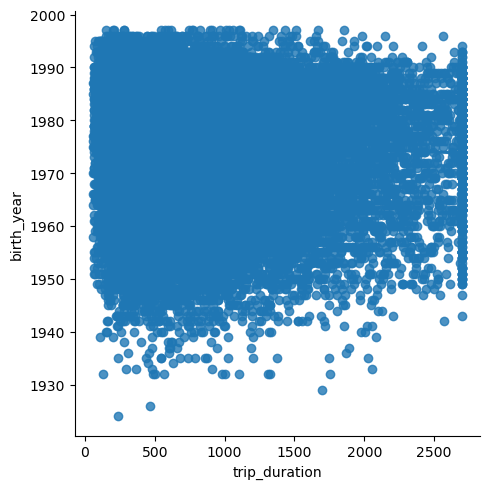

In [25]:
# Create scatterplot for the "trip_duration" and "birth_year" columns 
sns.lmplot(x = 'trip_duration', y = 'birth_year', data = df_sub)

# Step 5 - Pair Plots

In [19]:
df_listings.columns

Index(['Unnamed: 0', 'trip_id', 'weekday', 'start_hour', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'start_of_ride', 'end_of_ride'],
      dtype='object')

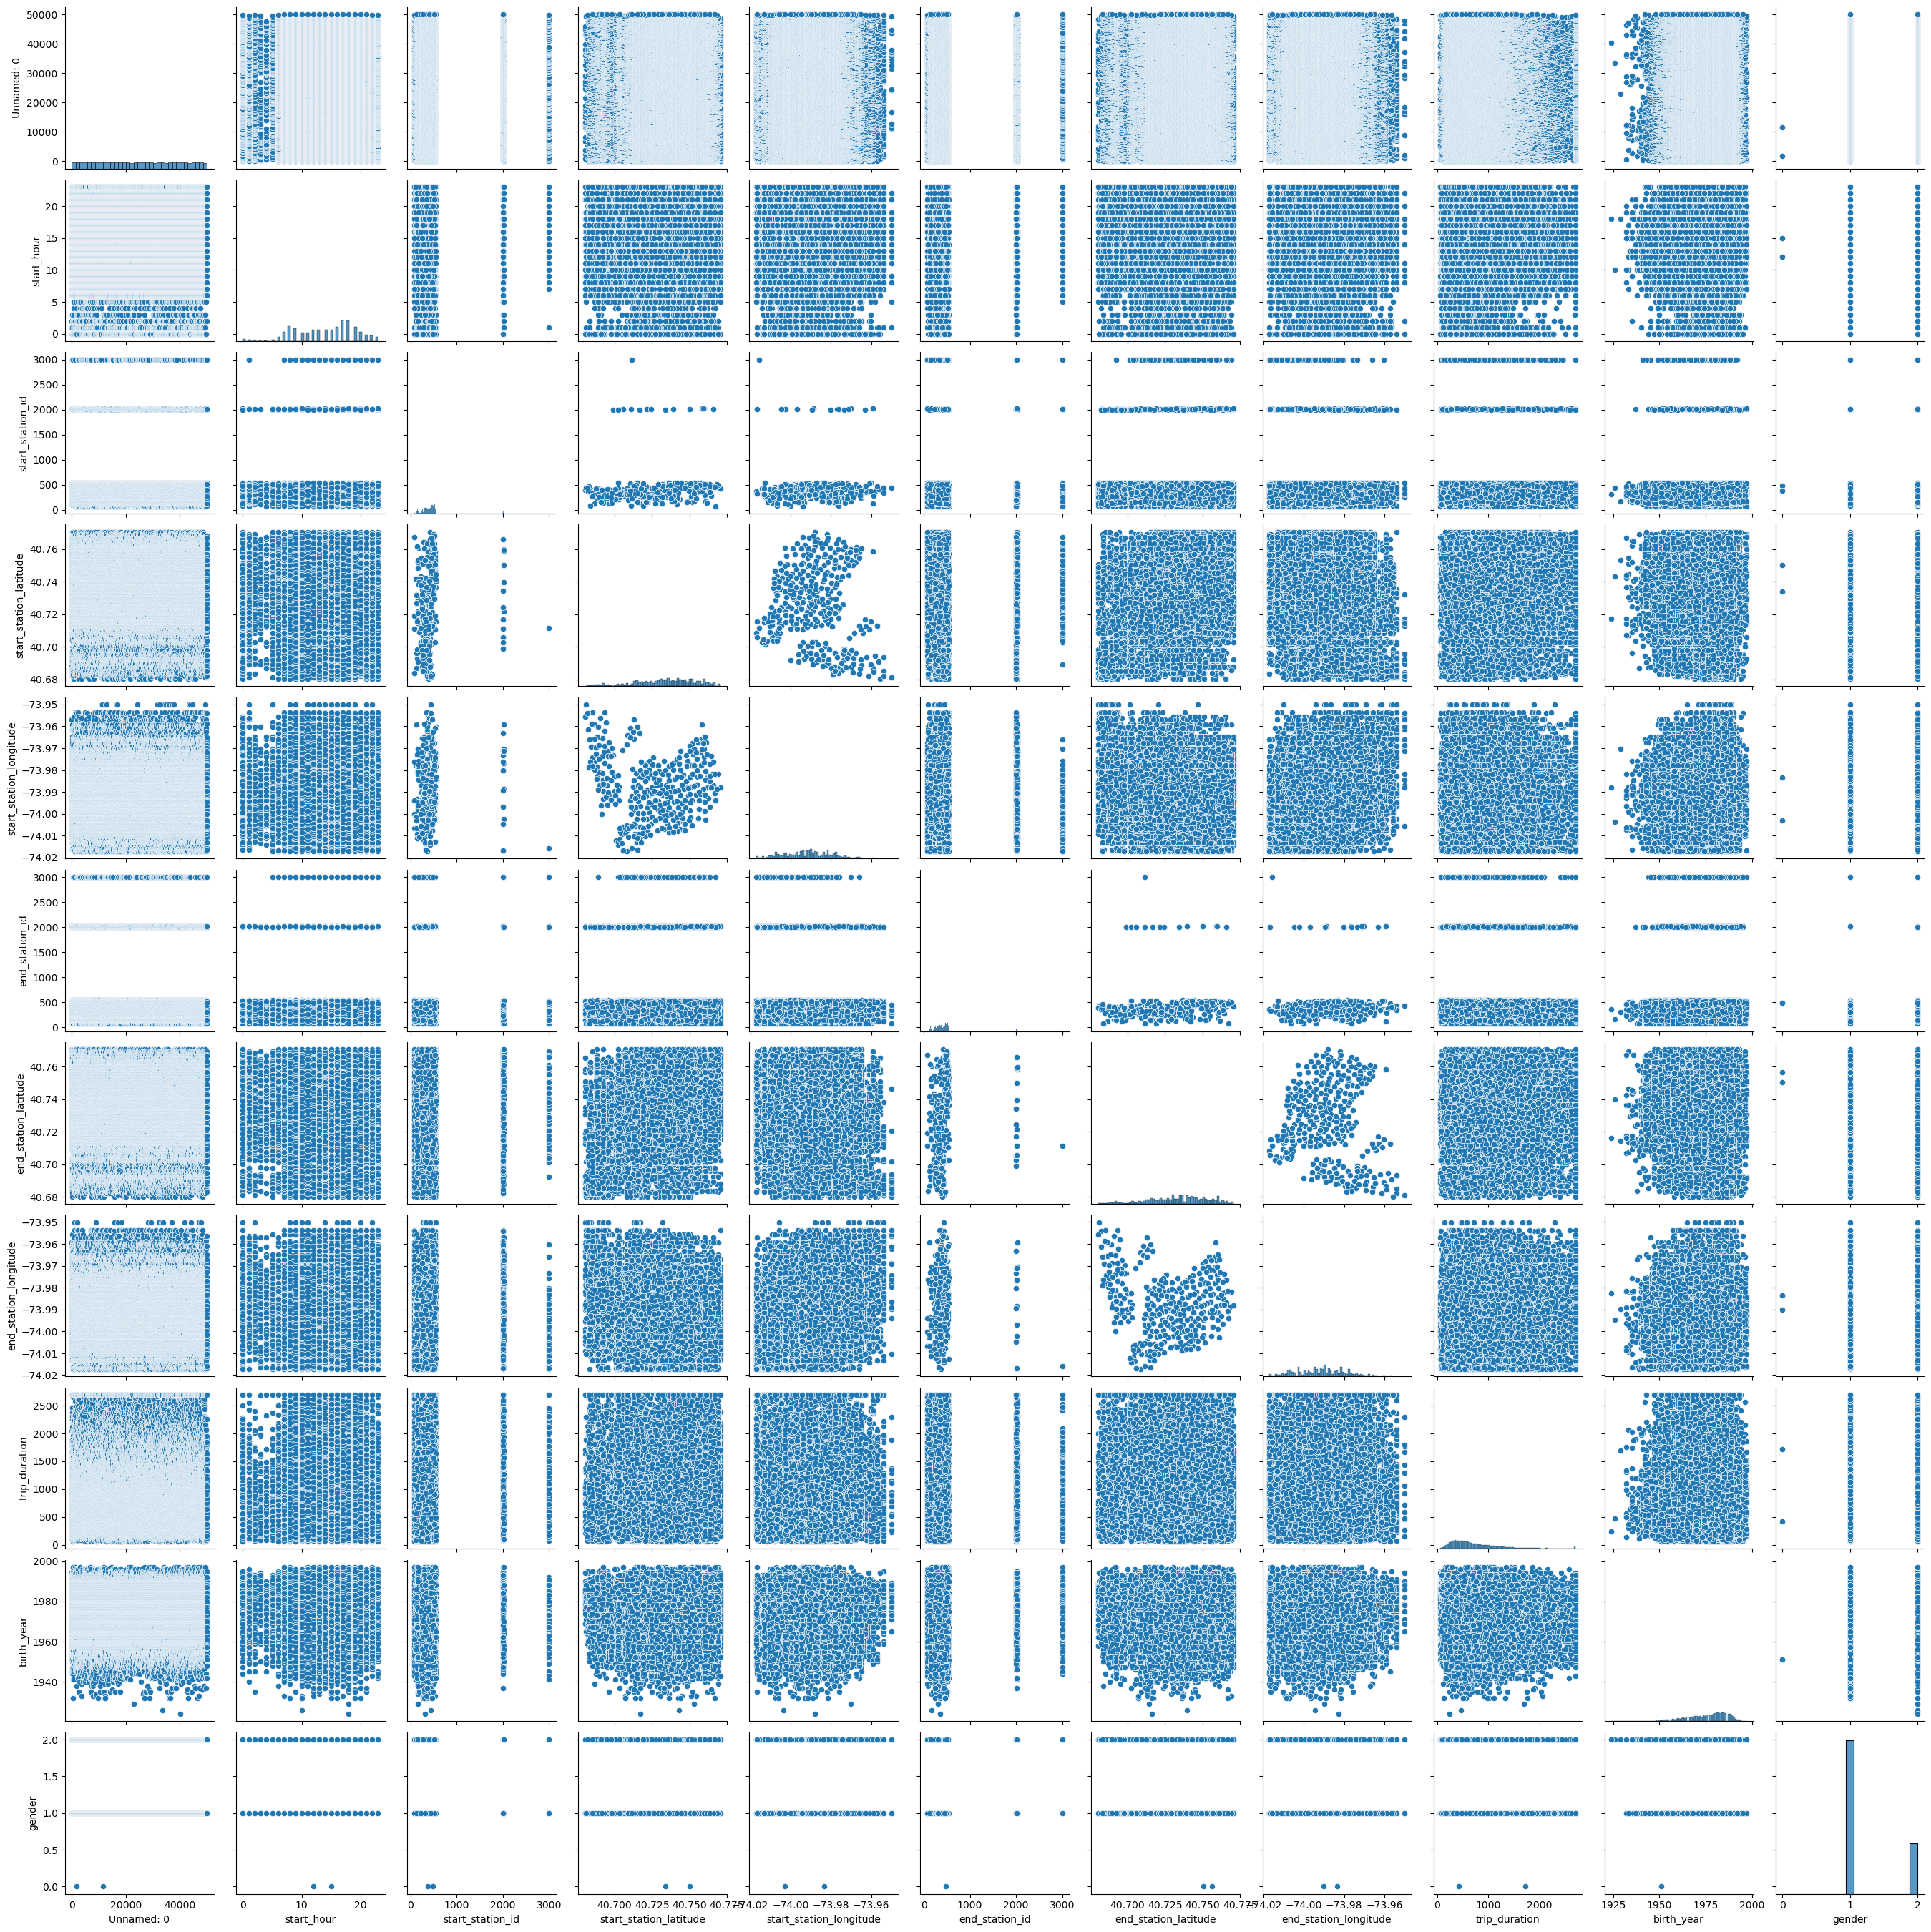

In [20]:
# Create pair plot
pairplot = sns.pairplot(df_listings)

In [21]:
#Export viz
pairplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot.png'))

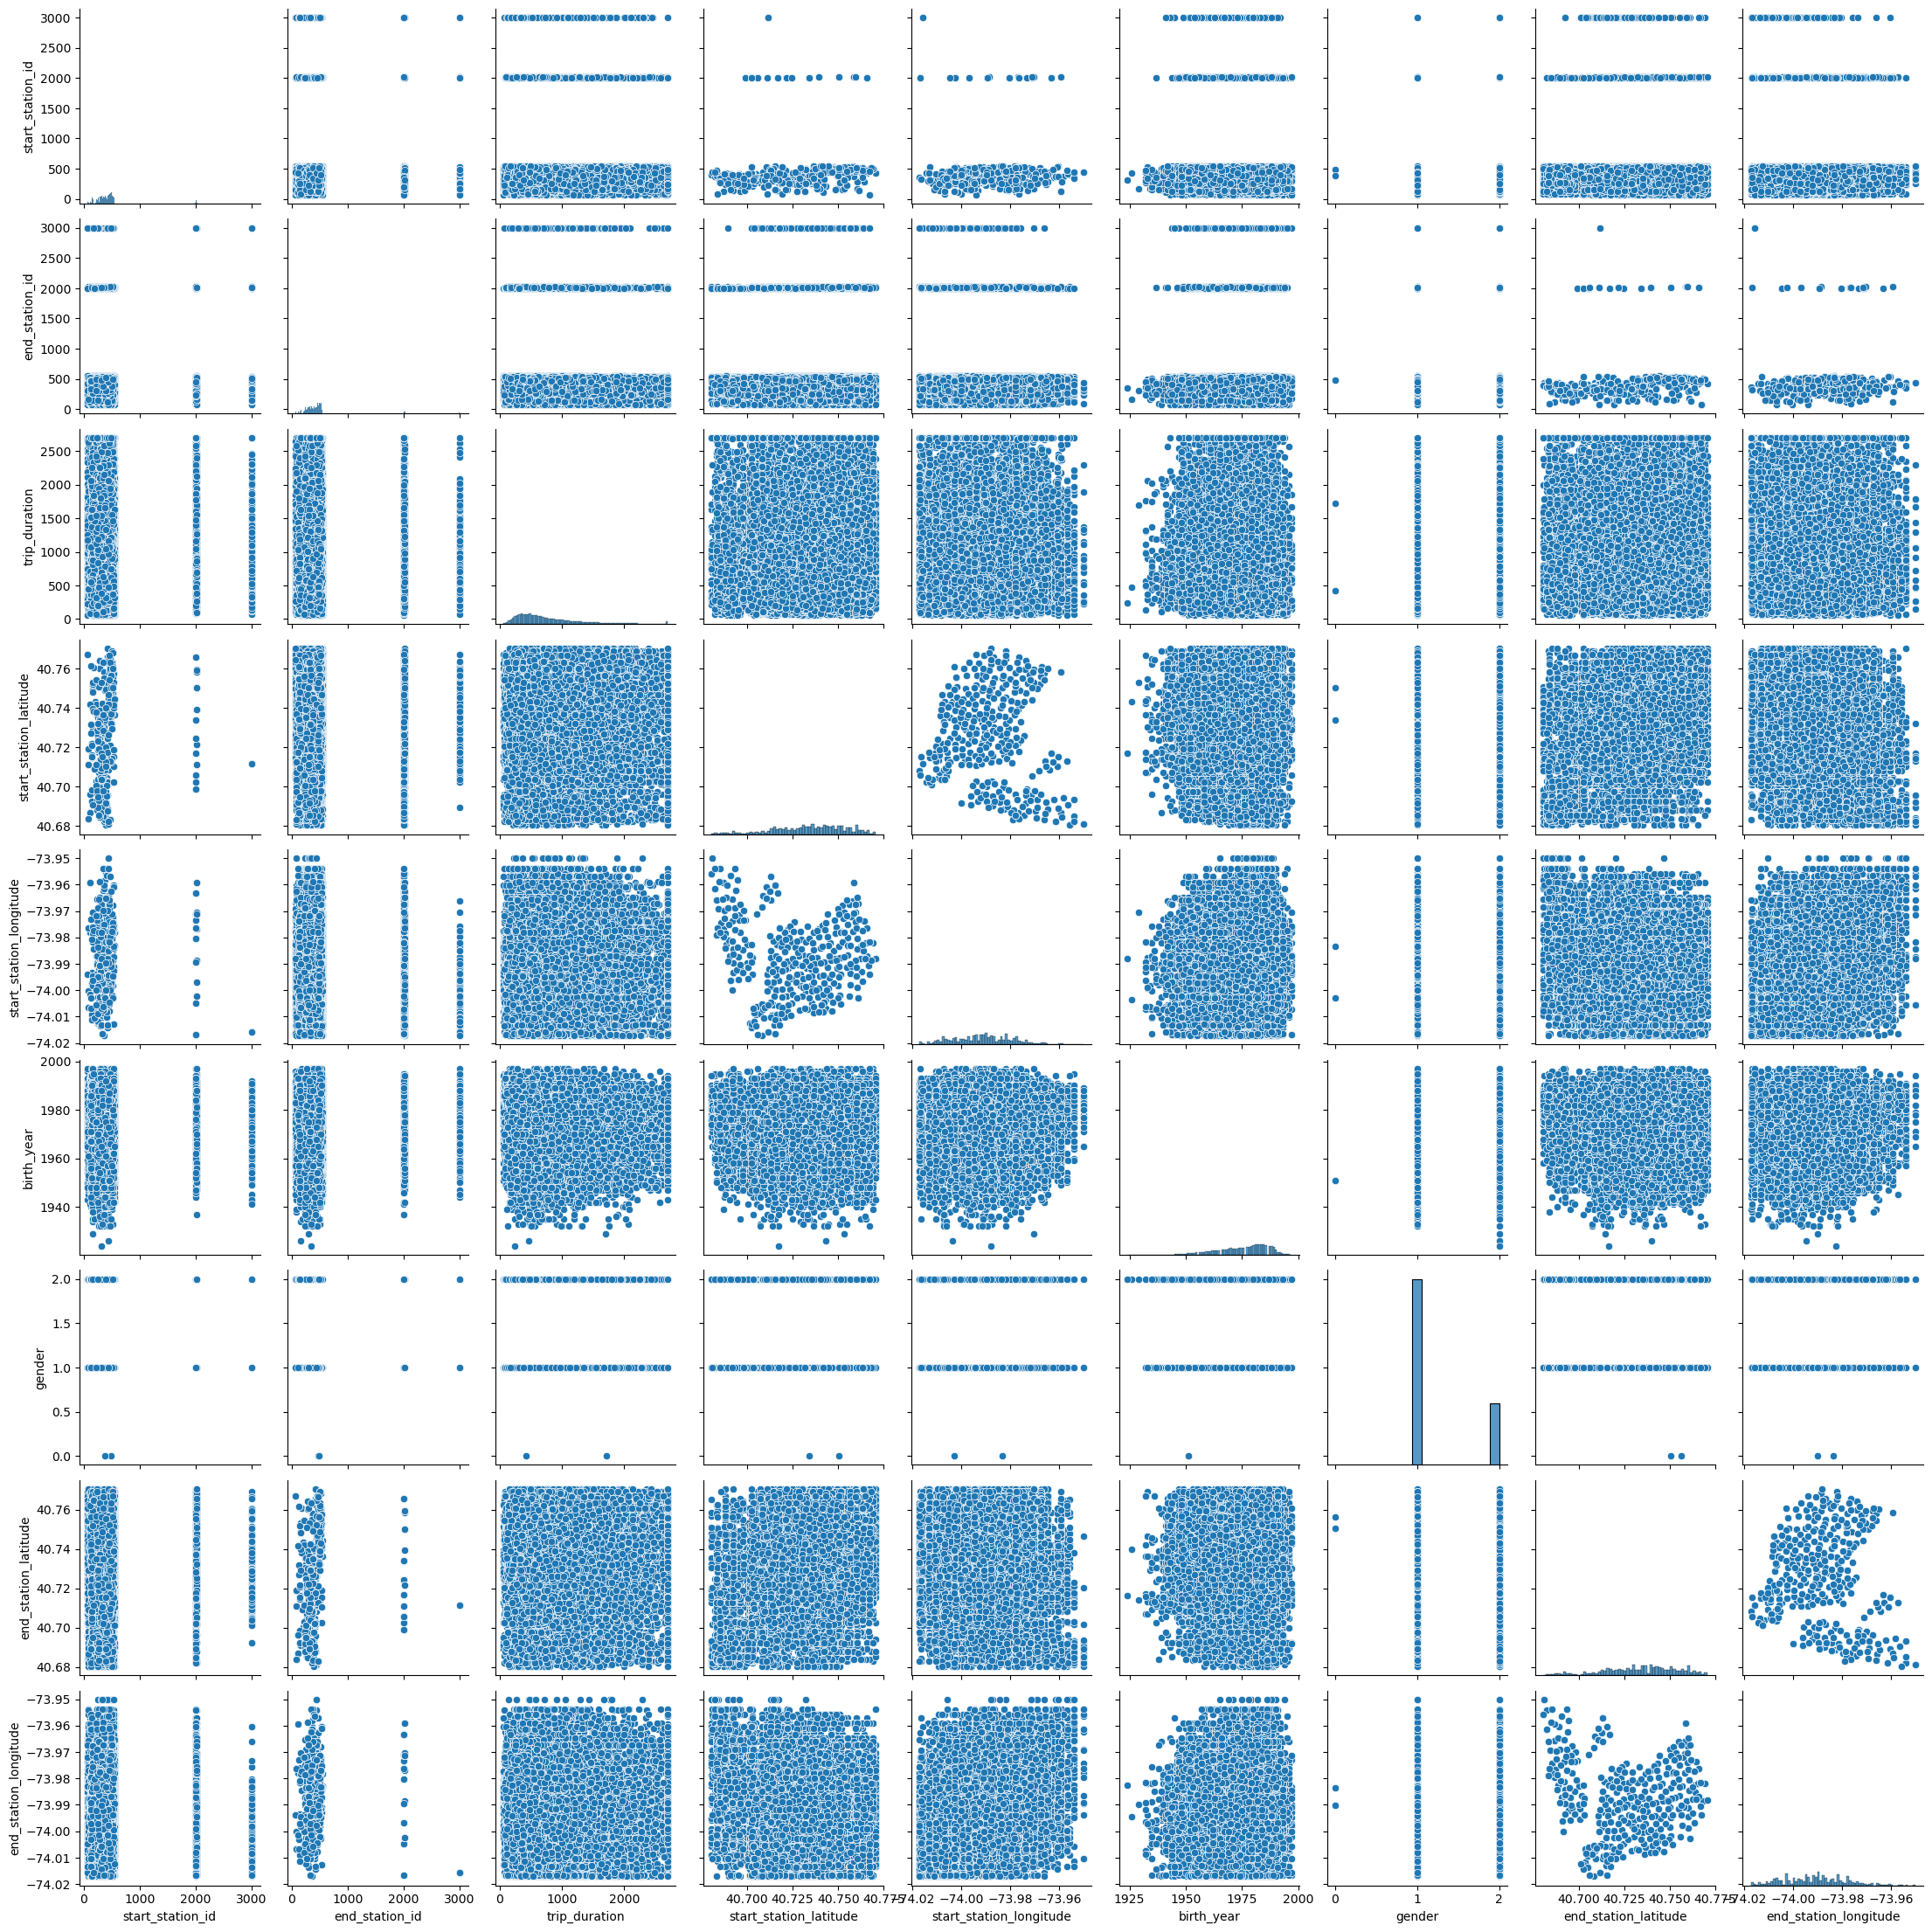

In [22]:
# Create pair plot for only value based variables
pairplot2 = sns.pairplot(df_sub)

In [23]:
#Export viz
pairplot2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot2.png'))

In [ ]:
Based on this pair plot, relationships between these variables are still not immediately very strong. There are a few variables
I would like to explore further in a categorical plot, namely the availability and trip_duration, and birth_year. 

# Step 6 - Categorical Plot

<Axes: xlabel='trip_duration', ylabel='Count'>

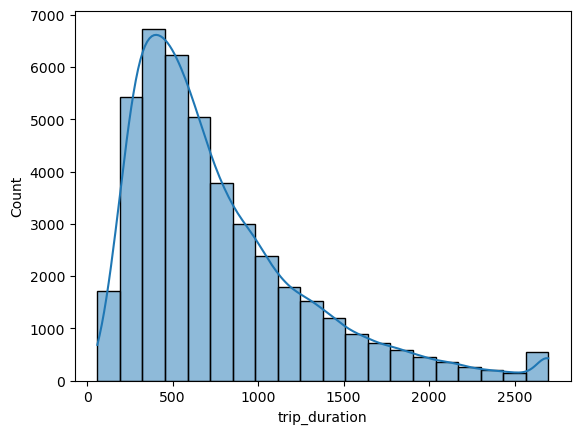

In [27]:
sns.histplot(df_listings['trip_duration'],bins = 20, kde = True)

<Axes: xlabel='birth_year', ylabel='Count'>

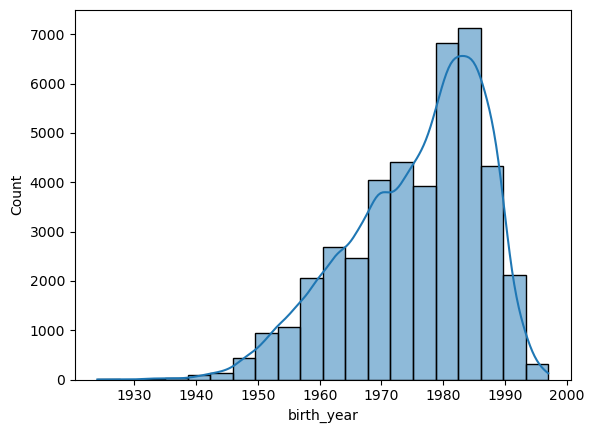

In [28]:
sns.histplot(df_listings['birth_year'],bins = 20, kde = True)

In [33]:
#Apply flags
df_listings.loc[df_listings['trip_duration'] < 100, 'duration'] = 'less duration'

In [34]:
df_listings.loc[(df_listings['trip_duration'] >= 100) & (df_listings['trip_duration'] < 1000 ), 'duration'] = 'medium duration'

In [35]:
df_listings.loc[df_listings['trip_duration'] > 1000, 'duration'] = 'more duration'

In [36]:
df_listings['duration'].value_counts(dropna = False)

medium duration    32028
more duration      10716
less duration        229
NaN                   20
Name: duration, dtype: int64

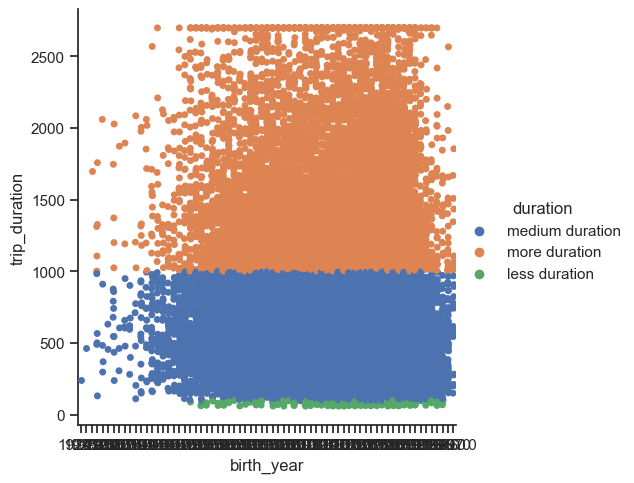

In [41]:
# Create Categorical Plot
sns.set(style = "ticks")
cat_1 = sns.catplot(x = 'birth_year', y = 'trip_duration', hue = 'duration', data = df_listings)

In [42]:
#Export viz
cat_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'trip_duration_categorical plot.png'))

In [ ]:
By this we will get to know that the people who is in between 1980's and 1990's used more city bikes 
and the maximum number of people used 300 to 1000 trip_duration.

# Step 7 : Answers after this calculations

In [ ]:
1. From the year 1970 to 1990, the city bike usage is more compare to the other years. In this the graph gradually increases.

In [ ]:
2. The usage of city bike till 1950 is very negligible and from the year 2000 also the graph decreased to null.

In [ ]:
3. More number of people used 300,400,500 trip duration compared to other.

In [ ]:
4. From the categorial graph we will get to know that the people used less duration is negligible.

# Step 8 : Hypothesis

In [ ]:
If the age group between 1970 to 1990 used more city bikes than others.

In [ ]:
Which days are the busiest in a week?

In [ ]:
what stations are the busiest?